### Q1 (a + b)

Matplotlib is building the font cache; this may take a moment.


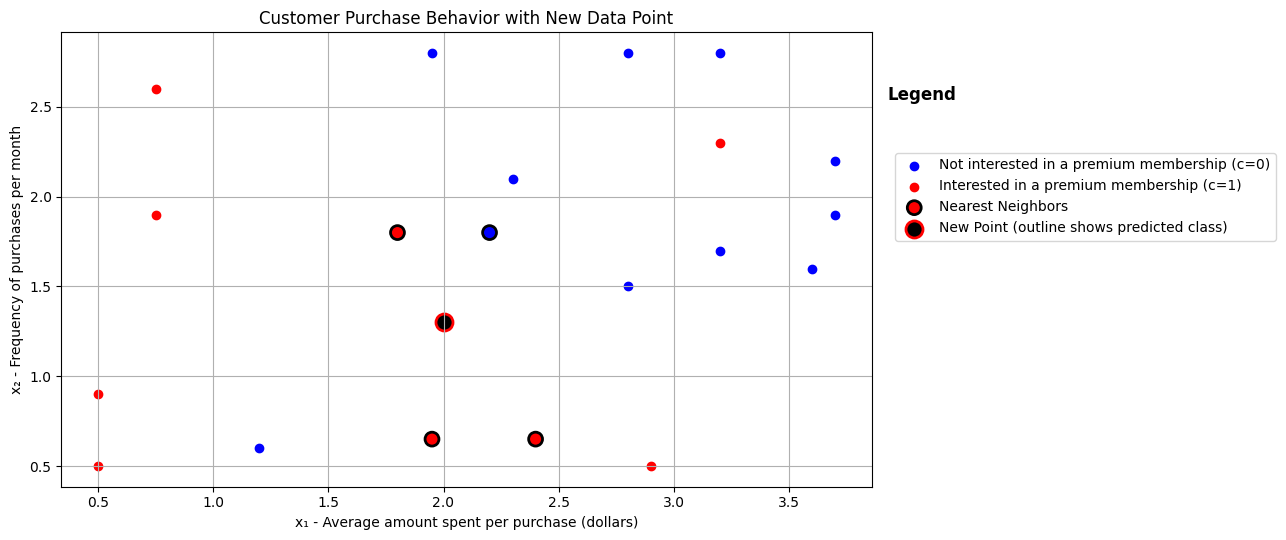

Predicted class for the new point [2, 1.3]: 1
K-Nearest Neighbors:
      x1    x2  c  distance
6   1.80  1.80  1  0.538516
10  2.20  1.80  0  0.538516
5   1.95  0.65  1  0.651920
8   2.40  0.65  1  0.763217


In [2]:
import pandas as pd
from matplotlib import pyplot as plt


def fnKNN(dataset, new_point, k):
    
    dataset = dataset.copy()  # Avoid modifying original dataset

    """Calculate the Euclidean distance between the new point and all points in the dataset
    Euclidean distance: √((x₁₁ - x₁₂)² + (x₂₁ - x₂₂)²). The distance is stored in a new column 'distance'
    For reference, ** 2 = ^2, ** 0.5 = ^0.5 = √
    """
    #dataset['distance'] = ([(dataset['x1'] - new_point[0]) ** 2] + [(dataset['x2'] - new_point[1]) ** 2]) ** 0.5
    dataset['distance'] = ((dataset['x1'] - new_point[0]) ** 2 + (dataset['x2'] - new_point[1]) ** 2) ** 0.5
        
    # Sort the dataset by distance
    dataset = dataset.sort_values('distance')

    # Get the k-nearest neighbors
    knn = dataset.head(k)

    # Predict class based on majority vote
    predicted_class = knn['c'].mode()[0]

    # Return the k-nearest neighbors and the predicted class
    return predicted_class, knn

# Set the size of the plot
plt.rcParams["figure.figsize"] = [13.00, 5.50]
plt.rcParams["figure.autolayout"] = True

# Read the dataset
df = pd.read_csv("CustomerDataset_Q1.csv")

# Separate points based on the value of c
class_0 = df[df['c'] == 0]
class_1 = df[df['c'] == 1]

# Plot all other points normally (without outline)
plt.scatter(class_0['x1'], class_0['x2'], color ='blue', label = 'Not interested in a premium membership (c=0)')
plt.scatter(class_1['x1'], class_1['x2'], color ='red', label = 'Interested in a premium membership (c=1)')

"These values can easily be changed to test different points and cases"
k = 4 # Number of neighbors to consider
new_point = [2, 1.3] # New point to predict

# Calculate the K-Nearest Neighbors of the scatterplot
predicted_class, knn_neighbors = fnKNN(df, new_point, k)

# Plot K-nearest neighbors with black outline clearly
plt.scatter(knn_neighbors['x1'], knn_neighbors['x2'],
            facecolor = knn_neighbors['c'].map({0:'blue', 1:'red'}),
            edgecolor = 'black',
            linewidth = 2,
            marker = 'o',
            s = 100,
            label = 'Nearest Neighbors')

# Plot the new point with colored outline based on predicted class
outline_color = 'red' if predicted_class == 1 else 'blue'
plt.scatter(new_point[0], new_point[1],
            color = 'black',
            edgecolor = outline_color,
            linewidth = 2,
            marker = 'o',
            s = 150,
            label = 'New Point (outline shows predicted class)')

# Label axes and title
plt.xlabel("x₁ - Average amount spent per purchase (dollars)")
plt.ylabel("x₂ - Frequency of purchases per month")
plt.title('Customer Purchase Behavior with New Data Point')

# Legend placement
legend = plt.legend(loc = 'upper left', bbox_to_anchor=(1.02, 0.75))

# Label above legend
plt.text(1.02, 0.85, "Legend",
         fontsize = 12, fontweight = 'bold',
         transform = plt.gca().transAxes)

# Grid and show plot
plt.grid(True)
plt.show()

# Print clearly the prediction results
print(f"Predicted class for the new point {new_point}: {predicted_class}")
print("K-Nearest Neighbors:")
print(knn_neighbors)

### Q1 (c)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Features (x1, x2) and target (c)
X = df[['x1', 'x2']]
y = df['c']

random_seed = 42

# Splits to evaluate: 80% train, 20% test ; 60% train, 40% test ; 50% train, 50% test
splits = [
    (0.8, 0.2),  #(16 train, 4 test)
    (0.6, 0.4),  #(12 train, 8 test)
    (0.5, 0.5)   #(10 train, 10 test)
]

# Evaluate performance for each split
for train_size, test_size in splits:
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=random_seed)
    
    # Combine features and target for training and test sets
    train_set = pd.concat([X_train, y_train], axis=1)
    test_set = pd.concat([X_test, y_test], axis=1)
    
    correct_predictions = 0
    
    # Iterate over each point in the test set
    for i in range(len(test_set)):
       
        new_point = test_set.iloc[i][['x1', 'x2']].values  # Features of the test point
        true_class = test_set.iloc[i]['c']  # True class of the test point
        
        # Predict the class using the k-NN function
        predicted_class, _ = fnKNN(train_set, new_point, k=1)
        
        # Check if the prediction is correct
        if predicted_class == true_class:
            correct_predictions += 1
    
    # Calculate accuracy
    accuracy = correct_predictions / len(test_set)
    
    # Print results
    print(f"Train size: {train_size*100}%, Test size: {test_size*100}%")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Number of training samples: {len(train_set)}")
    print(f"Number of test samples: {len(test_set)}")
    print("-" * 40)

Train size: 80.0%, Test size: 20.0%
Accuracy: 0.25
Number of training samples: 16
Number of test samples: 4
----------------------------------------
Train size: 60.0%, Test size: 40.0%
Accuracy: 0.50
Number of training samples: 12
Number of test samples: 8
----------------------------------------
Train size: 50.0%, Test size: 50.0%
Accuracy: 0.60
Number of training samples: 10
Number of test samples: 10
----------------------------------------


1. (16 train, 4 test): This split gives us the lowest relative accuracy, which is 25%. The model's poor perfomance coupled with the fact that we have a very low k (k = 1) suggests that the model is overfit.   

2. (12 train,8 test): When the training set is reduced and the test set increased, the accuracy is 50%. This suggests that the model is generalizing better, as the test set is larger. 
   
3. (10 train, 10 test): When the training set gets even smaller and the test set gets larger, the accuracy further improves to 60%. This tells us that the model performs better with the increased test set size.

Overall, the results show that as the training set gets smaller and the test set gets larger, the test accuracy improves. In other words, the k-NN classifier (with k=1) appears to generalize better when the test set is larger, becuase it is less likely to overfit to the training data. Note that this is the overall trend of the results, and not a generalization of all splits larger than the ones tested. However, it is important to recognize that with k=1, the model is highly sensitive to noise and outliers in the training data, which may explain the lower accuracy that we see across all splits, especially the first split.



### Q1 (d)

In [4]:
# Values of k to evaluate
k_values = [2, 3, 4]

# Evaluate performance for each split and each value of k
for k in k_values:
    print(f"Evaluating k-NN with k = {k}")
    for train_size, test_size in splits:
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=random_seed)
        
        # Combine features and target for training and test sets
        train_set = pd.concat([X_train, y_train], axis=1)
        test_set = pd.concat([X_test, y_test], axis=1)
        
        # Initialize counter for correct predictions
        correct_predictions = 0
        
        # Iterate over each point in the test set
        for i in range(len(test_set)):
            new_point = test_set.iloc[i][['x1', 'x2']].values  # Features of the test point
            true_class = test_set.iloc[i]['c']  # True class of the test point
            
            # Predict the class using the k-NN function
            predicted_class, _ = fnKNN(train_set, new_point, k=k)
            
            # Check if the prediction is correct
            if predicted_class == true_class:
                correct_predictions += 1
        
        # Calculate accuracy
        accuracy = correct_predictions / len(test_set)
        
        # Print results
        print(f"Train size: {train_size*100}%, Test size: {test_size*100}%")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Number of training samples: {len(train_set)}")
        print(f"Number of test samples: {len(test_set)}")
        print("-" * 40)
    print("\n")

Evaluating k-NN with k = 2
Train size: 80.0%, Test size: 20.0%
Accuracy: 0.25
Number of training samples: 16
Number of test samples: 4
----------------------------------------
Train size: 60.0%, Test size: 40.0%
Accuracy: 0.25
Number of training samples: 12
Number of test samples: 8
----------------------------------------
Train size: 50.0%, Test size: 50.0%
Accuracy: 0.40
Number of training samples: 10
Number of test samples: 10
----------------------------------------


Evaluating k-NN with k = 3
Train size: 80.0%, Test size: 20.0%
Accuracy: 0.75
Number of training samples: 16
Number of test samples: 4
----------------------------------------
Train size: 60.0%, Test size: 40.0%
Accuracy: 0.75
Number of training samples: 12
Number of test samples: 8
----------------------------------------
Train size: 50.0%, Test size: 50.0%
Accuracy: 0.80
Number of training samples: 10
Number of test samples: 10
----------------------------------------


Evaluating k-NN with k = 4
Train size: 80.0%, 



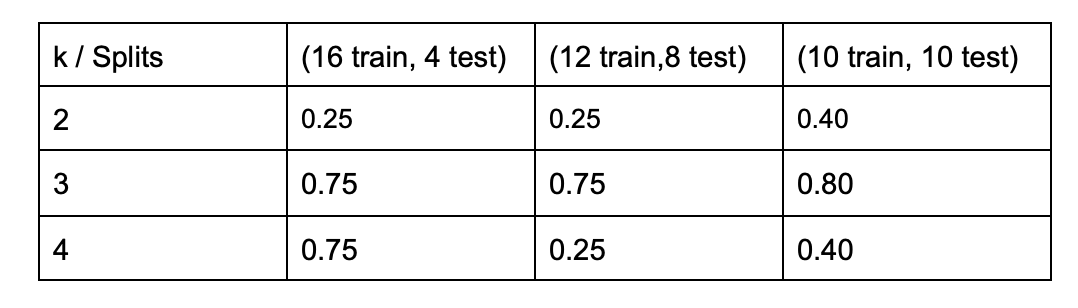

### Performance Across k

k = 2: The accuracy is low with the range across the splits being 0.25 – 0.40. This tells us that k = 2 is not a good choice for this dataset. This is likely because k = 2 can lead to ties in the majority vote which makes predictions unreliable.

k = 3: The accuracy is significantly higher with the range across the splits being 0.75 – 0.80, which in this case makes it the best performing value of k. This suggests that k = 3 provides a good balance between bias and variance for this dataset.

k = 4: The accuracy in this case is very inconsistent. The model performs well for the 80/20 split giving us an accuracy of 0.75, but it perfroms poorly for the 60/40 and 50/50 splits which gives accuracies of 0.25 and 0.40 respectively. This inconsistency tells us that k = 4 may not generalize well across different splits.


### Performance Across Splits

80/20 Split: This split performs well for k = 3 and k = 4, which gives us an accuracy of 0.75,  but it performs poorly for k = 2 giving an accuracy of 0.25.

Overall, this split typically leads to higher accuracies, which could be because the model has more examples to learn from, which helps it capture the underlying patterns in the data.

60/40 Split: This split performs well only for k = 3 where the accuracy is 0.75, but it performs poorly for k = 2 and k = 4 where the accruacy is 0.25.

Overall, the accuracy may decrease slightly compared to a larger training set, which we see in k = 4. This may be because the model has fewer examples to learn from.

50/50 Split: This split performs the best for k = 3 and gives us an accuracy of 0.80, which is the highest relative accruacy. The split performs moderately for k = 2 and k = 4 by giving an accuracy of 0.40.

Overall, by decreasing the size of the training set we risk introducing more variance into the model. However, in our case, k = 3 still performed well, and the other k's had performed moderately. 


### Q1 (e)


From these options, the moderate value of k = 3 provides the best balance between bias and variance, which leads to higher accuracies. When k = 3, k is an odd number which for knn is prefered over even values of k. This is because odd values of k avoid the problem of ties which can occur with even values of k. Usually, larger training sets improve performance, but the relationship is not always linear. In this case, the 50/50 split performed slightly better than the 80/20 split for k = 3. This split also has a sufficiently large test set. The combination of k = 3  with a 50/50 split is the best choice for this dataset, because it achieves the highest accuracy of 0.80. 